In [1]:
import sys
import os
import numpy as np
from IPython.display import Audio
from IPython.core.display import display, HTML

import torchaudio
import torch
import matplotlib.pyplot as plt
import torchaudio.transforms as T

/tmp/ipykernel_3961796/1291467600.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
path='/home/sxk230060/TI2AV/misc/ltx_lora_training_i2v_t2v/more_scripts/'
sys.path.append(path)
from analyse_vae_audio_auffusion import VAEAudioAnalyse

/home/sxk230060/miniconda3/envs/i2av/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sxk230060/miniconda3/envs/i2av/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/sxk230060/miniconda3/envs/i2av/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


### Encode and decode

In [3]:
vae_obj = VAEAudioAnalyse(spec_time_bins=512)
audio_path = '/mnt/ssd0/saksham/i2av/AVSync15/audios_together/I4JKaLOIEGs_000030_000040_3.0_6.0.wav'
latent = vae_obj.audio_to_latent(audio_path)
save_path = 'temp/reconstructed.wav'
vae_obj.latent_to_audio(latent, save_path)

Fetching 17 files: 100%|██████████| 17/17 [00:00<00:00, 131798.83it/s]
/home/sxk230060/miniconda3/envs/i2av/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


### Decode only

In [7]:

base_dir = '/mnt/ssd0/saksham/i2av/ltx_lora_training_i2v_t2v/cache_audio_256x512'
files = os.listdir(base_dir)
file_path = os.path.join(base_dir, files[6])
latent = torch.load(file_path)['latents']

vae_obj = VAEAudioAnalyse(spec_time_bins=512)

save_path = 'temp/reconstructed.wav'
vae_obj.latent_to_audio(latent, save_path)

Fetching 17 files: 100%|██████████| 17/17 [00:00<00:00, 155006.89it/s]


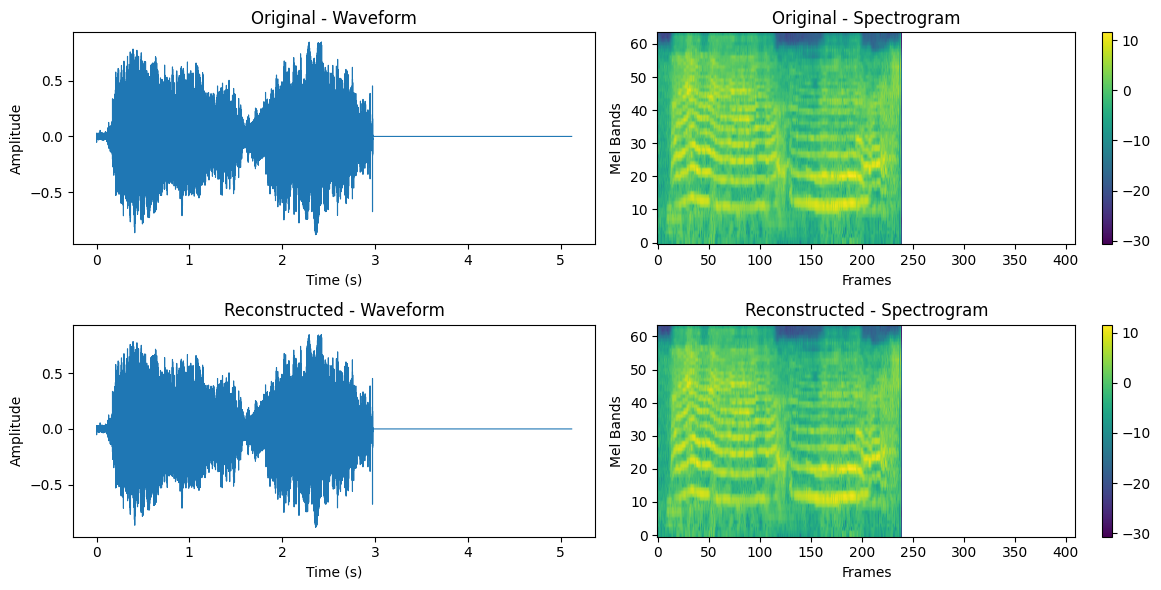

In [8]:
def plot_waveform_and_spectrogram(waveform, sr, title, ax1, ax2):

    ax1.plot(torch.arange(waveform.shape[1]) / sr, waveform.numpy().squeeze(), linewidth=0.8)
    ax1.set_title(f"{title} - Waveform")
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Amplitude")

    transform = T.MelSpectrogram(sample_rate=sr, n_mels=64)
    mel_spec = transform(waveform)

    im = ax2.imshow(mel_spec.log2().numpy().squeeze(), aspect='auto', origin='lower')
    ax2.set_title(f"{title} - Spectrogram")
    ax2.set_xlabel("Frames")
    ax2.set_ylabel("Mel Bands")
    plt.colorbar(im, ax=ax2)

waveform_orig, sr_orig = torchaudio.load(save_path)
waveform_recon, sr_recon = torchaudio.load(save_path)

assert sr_orig == sr_recon, "Sampling rates must match!"

fig, axes = plt.subplots(2, 2, figsize=(12, 6))

plot_waveform_and_spectrogram(waveform_orig, sr_orig, "Original", axes[0, 0], axes[0, 1])
plot_waveform_and_spectrogram(waveform_recon, sr_recon, "Reconstructed", axes[1, 0], axes[1, 1])

plt.tight_layout()
plt.show()

In [9]:
Audio(save_path)

In [10]:
Audio(save_path)